## Weeks 9 & 10 Exercises

## Understanding Packages

Amelia Farrell

DSC540

5/14/23


In [ ]:
# Connecting to google drive
from google.colab import drive 
drive.mount('/content/drive')

# Change to the google drive directory
%cd /content/drive/MyDrive/Colab\ Notebooks/DSC540

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/DSC540


## 1. Data Wrangling with Python: Activity 9, page 294

Top 100 Ebooks from Gutenberg

In [ ]:
# importing libraries needed
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re

In [ ]:
# checking SSL cert (ignoring errors)
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [ ]:
# reading HTML from URL with bs4
top100url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(top100url)

In [ ]:
# creating a function that checks the status of web request
def status_check(r):
    if r.status_code==200:
        print("successful")
        return 1
    else:
        print("failed request")
        return -1

In [ ]:
# checking status
status_check(response)

successful


1

In [ ]:
# decoding response from the HTML response
htmlcontents = response.content.decode(response.encoding)
# parsing using bs4
parseddata = BeautifulSoup(htmlcontents, 'html.parser')

In [ ]:
# creating an empty list
link_list =[]
# finding all href tags and storing them in a list of links
for link in parseddata.find_all('a'):
    #print(link.get('href'))
    link_list.append(link.get('href'))
# printing the frist 30 from the list we just created
link_list [:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

In [ ]:
# using regex to find the numeric digits within the links above
# to do so we first create another empty list
book_numbers =[]
# next, we create a function to loop over the range and use regex to find the numeric digits within the list of links (href strings).
for i in range(19,119):
    link=link_list [i]
    link=link.strip()
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        book_numbers.append(int(n[0]))

In [ ]:
# printing our book numbers
print(book_numbers)

[1, 1, 7, 7, 30, 30, 1513, 2701, 2641, 145, 100, 37106, 16389, 67979, 6761, 394, 2160, 6593, 4085, 1259, 5197, 1342, 84, 20228, 47629, 11, 16158, 42108, 174, 70749, 345, 64317, 70751, 43, 98, 5200, 10676, 28054, 27827, 70745, 2600, 6130, 70748, 2542, 844, 1400, 24176, 1184, 1661, 2554, 4300, 76, 30254, 2591, 1232, 15845, 4363, 70750, 74, 70744, 1080, 996, 1260, 46, 35899, 120, 1952, 58585, 1998, 25344, 308, 205, 1727, 45, 2680, 16, 1399, 33283, 67098, 3206, 135, 2500, 5740, 8800, 36, 2814, 219, 24790, 1497, 158, 55, 768]


In [ ]:
# what does our bs4 object look like? 
# lerts take a look useing the .text() method (printing only first 2000 characters)
print(parseddata.text[:2000])






Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright How-To
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2023-05-13200460
last 7 days1655506
last 30 days7650601



Top 100 EBooks yesterday
T

In [ ]:
# searching the extracted text (with regex) from the object to find the names of top 100 Ebooks
# first creating an empty list to store Ebook names
titles_list =[]

# creating a starting index that points at the text "Top 100 Ebooks yesterday"
start_idx=parseddata.text.splitlines().index('Top 100 EBooks yesterday')

# creating a function to loop 1-100 and add the strings of next 100 lines to our titles_list
for i in range(100):
    titles_list.append(parseddata.text.splitlines()[start_idx+2+i])

# using regex to extract only text from the name strings and append to another empty list
titles_list2=[]
for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*',titles_list[i]).span()
    titles_list2.append(titles_list[i][id1:id2])

# using a for loop to print the list of titles we just created above
for l in titles_list2:
    print(l)

Top 
Top 
Top 
Top 


Top 

Romeo and Juliet by William Shakespeare 
Moby Dick
A Room with a View by E
Middlemarch by George Eliot 
The Complete Works of William Shakespeare by William Shakespeare 
Little Women
The Enchanted April by Elizabeth Von Arnim 
The Blue Castle
The Adventures of Ferdinand Count Fathom 
Cranford by Elizabeth Cleghorn Gaskell 
The Expedition of Humphry Clinker by T
History of Tom Jones
The Adventures of Roderick Random by T
Twenty Years After by Alexandre Dumas 
My Life 
Pride and Prejudice by Jane Austen 
Frankenstein
Noli Me Tangere by Jos
Ang 
Alice
The Facts of Reconstruction by John Roy Lynch 
The slang dictionary 
The Picture of Dorian Gray by Oscar Wilde 
Cosmic symbolism 
Dracula by Bram Stoker 
The Great Gatsby by F
Archeological investigations in New Mexico
The Strange Case of Dr
A Tale of Two Cities by Charles Dickens 
Metamorphosis by Franz Kafka 
The Reign of Greed by Jos
The Brothers Karamazov by Fyodor Dostoyevsky 
The Kama Sutra of Vatsyayana by 

## 2. Data Wrangling with Python: Activity 10, page 295

Building your own movie database by reading from an API

In [ ]:
# importing libraries needed
import urllib.request, urllib.parse, urllib.error
import json

In [ ]:
# obtaing API key from omdb.com
# https://www.omdbapi.com/apikey

# loading the secret API key, storing it as APIkeys.json, and opening the API
with open('APIkeys.json') as f:
    keys = json.load(f)
    omdbapi = keys["OMDBapi"]

In [ ]:
# assigning the omdb portal as a string variable
omdbportal = 'http://www.omdbapi.com/?'
# creating a variable called apikey
apikey = '&apikey='+omdbapi

In [ ]:
# creating a utility function to print the moive data from the JSON file (obtained from the API protal)
def print_json(json_data):
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    print("-"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-"*50)

In [ ]:
# creating a utility function to download a poster of the movie based on the information from the jason dataset
def save_poster(json_data):
    import os
    title = json_data['Title']
    poster_url = json_data['Poster']
    # Splits the poster url by '.' and picks up the last string as file extension
    poster_file_extension=poster_url.split('.')[-1]
    # Reads the image file from web
    poster_data = urllib.request.urlopen(poster_url).read()
        
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    # Creates new directory if the directory does not exist. Otherwise, just use the existing path.
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    
    filename=savelocation+str(title)+'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data)
    f.close()

In [ ]:
# creating a utility function to search a movie by its name, print the JSON data (using the print_json function) 
# and saving the movie poster in the local folder (using the save_poster function)
def search_movie(title):
    try:
        url = omdbportal + urllib.parse.urlencode({'t': str(title)})+apikey
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        
        if json_data['Response']=='True':
            print_json(json_data)
            # Asks user whether to download the poster of the movie
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print("Error encountered: ",json_data['Error'])
    
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

In [ ]:
# testing our functions above by entering "Titanic"
search_movie("Titanic")

Retrieving the data of "Titanic" now... 
http://www.omdbapi.com/?t=Titanic&apikey=3d98fcd4
--------------------------------------------------
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States, Mexico
Awards: Won 11 Oscars. 126 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '88%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.9
imdbVotes: 1,215,822
imdbID: tt0120338
--------------------------------------------------


In [ ]:
# testing our functions above by entering "Random_error" to see what will happen when the movie cannot be found.
search_movie("Random_error")

Retrieving the data of "Random_error" now... 
http://www.omdbapi.com/?t=Random_error&apikey=3d98fcd4
ERROR: Unauthorized


## 3. API

Here we wil be connecting to the currency-exchange API from rapidapi to find the current extange rate from ERO to USD.
We will connect to the API and "Get" call/operation on the API to return the current extange.

Link to API: https://currency-exchange.p.rapidapi.com/exchange

In [1]:
# importing libraries needed
import requests

url = "https://currency-exchange.p.rapidapi.com/exchange"

querystring = {"from":"ERO","to":"USD","q":"1.0"}

headers = {
	"X-RapidAPI-Key": "9d0e146c26mshf2a9609c55e0254p181d7fjsn9a211d034509",
	"X-RapidAPI-Host": "currency-exchange.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

# printing the current extange rate from ERO to USD
print(response.json())


1.08175


## 4. Housing Dataset

3 Data visualizations using the Housing Dataset from Kaggle.

Link to dataset: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset?resource=download


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data

In [ ]:
# reading the housing dataset
df = pd.read_csv('Housing.csv')
# checking the first 10 records
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [ ]:
len(df)

545

Histogram

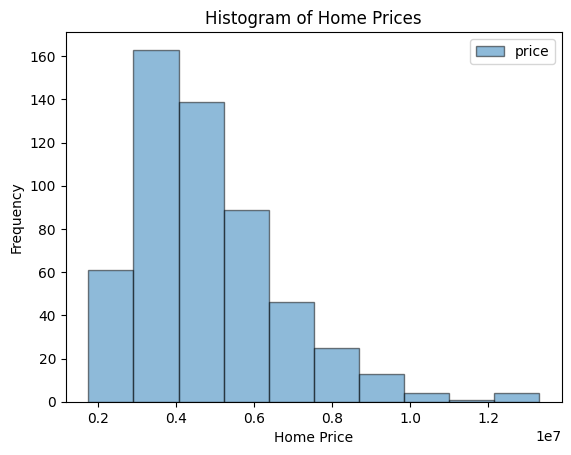

In [ ]:
# selecting columns for histogram
columns = ['price']

# creating the histogram
df[columns].plot.hist(bins=10, edgecolor='black', alpha=0.5)
plt.xlabel('Home Price')
plt.ylabel('Frequency')
plt.title('Histogram of Home Prices')

# displaying the histogram
plt.show()

Scatter Plot

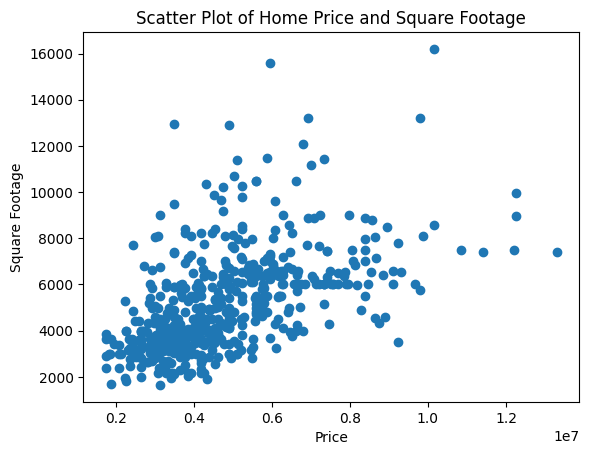

In [ ]:
# Creating the scatter plot
x = df['price']
y = df['area']
plt.scatter(x, y)

# Adding labels and title
plt.xlabel('Price')
plt.ylabel('Square Footage')
plt.title('Scatter Plot of Home Price and Square Footage')

# Displaying the scatter plot
plt.show()

Density Plot

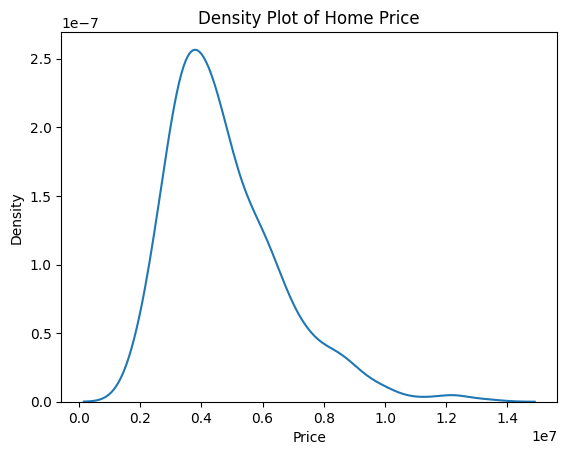

In [ ]:
pricedata = df['price']

# Creating the density plot
sns.kdeplot(pricedata)

# Adding labels and title
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Density Plot of Home Price')

# Displaying the density plot
plt.show()